# Business case

John the CEO of the winery located in Vilafranca del Penedés wine company has been very happy with the exploratory analysis we did a few days ago. Good work!

    John gave us two NEW datasets containing information regarding two qualities of wines from his winery. He wants to dive into this data and try to stablish a standard and robust model for both varieties of wines. He normally uses an external control panel in order to stablish the mentioned label (quality of wine) but it is really expensive. He wants to know whether he could save some money by building a classification model to predict the quality of his wines in function of some other features.


## Key information of the variables



Datasets: `winequality-1.csv` and `winequality-2.csv`. 

> Remember that you should merge both of them and create a new variable (quality) which will be your target variables

**Help John because he is our super-star client !**

In [1]:
import sys
sys.path.insert(0, '../_functions_')

In [2]:
print(sys.path)

['../_functions_', '/Users/albagomez/Documents/all_women_data_science/github/data-science-and-machine-learning/notebooks', '/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python37.zip', '/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7', '/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/lib-dynload', '', '/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages', '/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/IPython/extensions', '/Users/albagomez/.ipython']


In [3]:
from fx_MLClassification import *
from Functions_EDA import *

In [4]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math 

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet, LassoCV
from sklearn.ensemble import RandomForestRegressor ,BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# Modelling Helpers :
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler, scale
from sklearn.tree import DecisionTreeClassifier

# Metrics - Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
%matplotlib inline


from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [5]:
# Steps to follow:
# 1. Import both datsets and have a look at it. 
df1 = pd.read_csv('../datasets/winequality-1.csv', sep=";")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_hue,Age
0,"7,02","0,26","0,21","16,2","0,074",41,197,"0,998","3,02","0,5","9,8",3,10
1,"6,02","0,24","0,44","3,5","0,029",5,109,"0,9913","3,53","0,43","11,7",3,12
2,"7,02","0,59","0,38","1,6","0,066",34,182,"0,9968","3,23","0,38","8,5",3,14
3,"7,02","0,32","0,32",11,"0,038",16,66,"0,9937","3,24","0,4","11,5",3,13
4,"6,02","0,39","0,4","4,6","0,022",5,19,"0,9915","3,31","0,37","12,6",3,11


In [6]:
df2 = pd.read_csv('../datasets/winequality-2.csv')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_hue,Age
0,"10,3729451124309","0,7",0,"1,9",76,11,34,"0,9978","3,51","0,56","9,4",5,15
1,"9,32846072267732","0,88",0,"2,6",98,25,67,"0,9968","3,2","0,68","9,8",5,13
2,"9,5949801997539","0,76","0,04","2,3",92,15,54,997,"3,26","0,65","9,8",5,12
3,"10,8723795304885","0,28","0,56","1,9",75,17,60,998,"3,16","0,58","9,8",6,18
4,"10,029247902707","0,7",0,"1,9",76,11,34,"0,9978","3,51","0,56","9,4",5,17


In [7]:
df1.shape

(4898, 13)

In [8]:
df2.shape

(1599, 13)

In [9]:
# 2. Merge both datasets and create a new variable named target

df1['target'] = 'quality_1'
df2['target'] = 'quality_2'

data = pd.concat([df1, df2], axis=0, ignore_index=True)
# data.reset_index(drop=True, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_hue,Age,target
0,"7,02","0,26","0,21","16,2","0,074",41,197,"0,998","3,02","0,5","9,8",3,10,quality_1
1,"6,02","0,24","0,44","3,5","0,029",5,109,"0,9913","3,53","0,43","11,7",3,12,quality_1
2,"7,02","0,59","0,38","1,6","0,066",34,182,"0,9968","3,23","0,38","8,5",3,14,quality_1
3,"7,02","0,32","0,32",11,"0,038",16,66,"0,9937","3,24","0,4","11,5",3,13,quality_1
4,"6,02","0,39","0,4","4,6","0,022",5,19,"0,9915","3,31","0,37","12,6",3,11,quality_1


In [10]:
data.shape

(6497, 14)

In [11]:
# Identify the target variable (remember that we are going to classify, so we need GROUPS or labels)

In [12]:
data.target.value_counts()

quality_1    4898
quality_2    1599
Name: target, dtype: int64

In [13]:
# EDA and Data Cleaning: check missing values, possible Outliers, type of variables (categorical, numerical)...

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         6497 non-null   object
 1   volatile acidity      6497 non-null   object
 2   citric acid           6497 non-null   object
 3   residual sugar        6497 non-null   object
 4   chlorides             6497 non-null   object
 5   free sulfur dioxide   6497 non-null   object
 6   total sulfur dioxide  6497 non-null   object
 7   density               6497 non-null   object
 8   pH                    6497 non-null   object
 9   sulphates             6497 non-null   object
 10  alcohol               6497 non-null   object
 11  color_hue             6497 non-null   int64 
 12  Age                   6497 non-null   int64 
 13  target                6497 non-null   object
dtypes: int64(2), object(12)
memory usage: 710.7+ KB


In [15]:
for column in data.drop(['target'], axis=1):
     if data[column].dtype == 'object': 
            data[column] = data[column].str.replace(',','.')
            data[column] = data[column].astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  color_hue             6497 non-null   int64  
 12  Age                   6497 non-null   int64  
 13  target                6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [17]:
data['target'] = data['target'].astype('category')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  color_hue             6497 non-null   int64   
 12  Age                   6497 non-null   int64   
 13  target                6497 non-null   category
dtypes: category(1), float64(11), int64(2)
memory usage: 666.

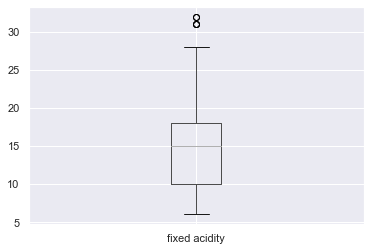

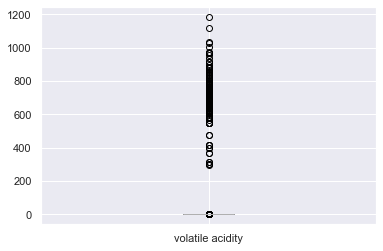

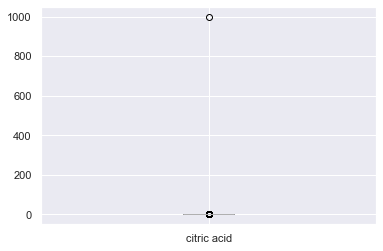

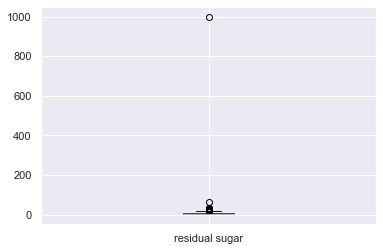

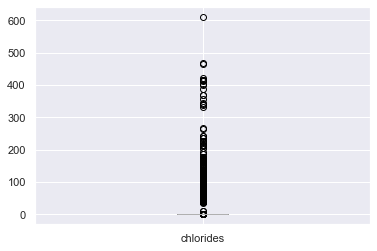

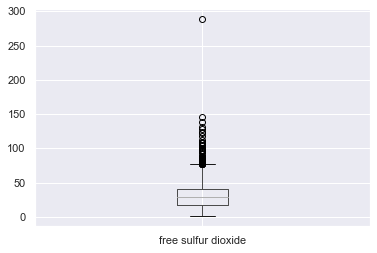

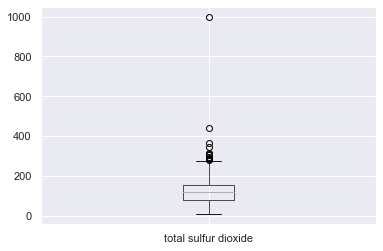

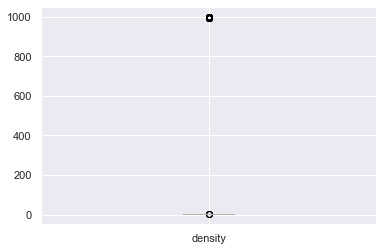

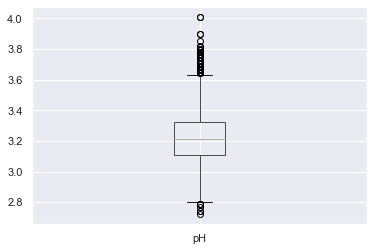

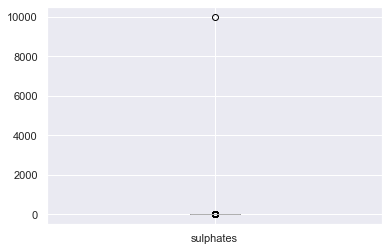

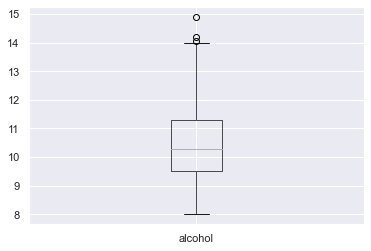

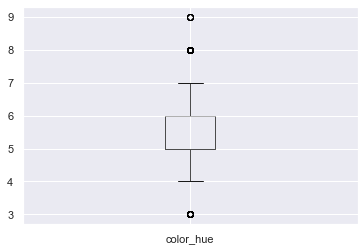

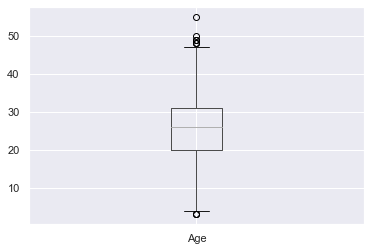

In [19]:
for column in data.drop(['target'], axis=1):
    plt.figure()
    data.boxplot([column])

In [20]:
# 5. Feature engineering: data transformations (scaling, log...) and encoding cat variables
data_c = data.copy()
data_c.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_hue,Age,target
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10,quality_1
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12,quality_1
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,14,quality_1
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,13,quality_1
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,11,quality_1


In [21]:
data_c.nunique()

fixed acidity           1620
volatile acidity         212
citric acid               90
residual sugar           317
chlorides                304
free sulfur dioxide      135
total sulfur dioxide     277
density                 1005
pH                       108
sulphates                112
alcohol                  111
color_hue                  7
Age                       45
target                     2
dtype: int64

In [22]:
data_c.color_hue.value_counts()

6    2835
5    2139
7    1079
4     216
8     193
3      30
9       5
Name: color_hue, dtype: int64

In [23]:
data_c.Age.value_counts()

20    398
30    360
28    349
27    347
26    341
29    338
32    324
21    318
31    305
24    288
23    280
22    280
15    262
17    254
16    235
18    209
39    200
38    179
40    173
35    157
36    150
37    128
13    111
19    110
14    108
12    102
41     45
25     33
42     33
8      15
7      15
11      9
10      7
9       7
5       4
6       4
4       3
3       3
49      3
48      3
46      2
45      2
50      1
47      1
55      1
Name: Age, dtype: int64

In [24]:
data_c.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color_hue', 'Age', 'target'],
      dtype='object')

## Scaling our data

In [25]:
# Initialise the Scaler 
scaler = RobustScaler() 
scaler

RobustScaler()

In [26]:
# Scale data 
data2 = data_c.drop(['target'], axis=1)
dfname = data2.columns
data_Rscaled = scaler.fit_transform(data2)
data_Rscaled = pd.DataFrame(data_Rscaled, columns=dfname)
data_Rscaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_hue,Age
0,-1.000,-0.166667,-0.714286,2.095238,0.586957,0.500000,1.000000,0.667382,-0.904762,-0.058824,-0.277778,-3.0,-1.454545
1,-1.125,-0.277778,0.928571,0.079365,-0.391304,-1.000000,-0.113924,-0.770386,1.523810,-0.470588,0.777778,-3.0,-1.272727
2,-1.000,1.666667,0.500000,-0.222222,0.413043,0.208333,0.810127,0.409871,0.095238,-0.764706,-1.000000,-3.0,-1.090909
3,-1.000,0.166667,0.071429,1.269841,-0.195652,-0.541667,-0.658228,-0.255365,0.142857,-0.647059,0.666667,-3.0,-1.181818
4,-1.125,0.555556,0.642857,0.253968,-0.543478,-1.000000,-1.253165,-0.727468,0.476190,-0.823529,1.277778,-3.0,-1.363636


In [27]:
target_label = data_c[['target']]
# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
target_label['target'] = lb_make.fit_transform(target_label['target'])

target_label.head() #Results in appending a new column to df

,target
0,0
1,0
2,0
3,0
4,0


In [28]:
target_label.target.value_counts()

0    4898
1    1599
Name: target, dtype: int64

In [29]:
data_scaled = pd.concat([data_Rscaled, target_label], axis=1)
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_hue,Age,target
0,-1.000,-0.166667,-0.714286,2.095238,0.586957,0.500000,1.000000,0.667382,-0.904762,-0.058824,-0.277778,-3.0,-1.454545,0
1,-1.125,-0.277778,0.928571,0.079365,-0.391304,-1.000000,-0.113924,-0.770386,1.523810,-0.470588,0.777778,-3.0,-1.272727,0
2,-1.000,1.666667,0.500000,-0.222222,0.413043,0.208333,0.810127,0.409871,0.095238,-0.764706,-1.000000,-3.0,-1.090909,0
3,-1.000,0.166667,0.071429,1.269841,-0.195652,-0.541667,-0.658228,-0.255365,0.142857,-0.647059,0.666667,-3.0,-1.181818,0
4,-1.125,0.555556,0.642857,0.253968,-0.543478,-1.000000,-1.253165,-0.727468,0.476190,-0.823529,1.277778,-3.0,-1.363636,0


### Studying the correlation between variables

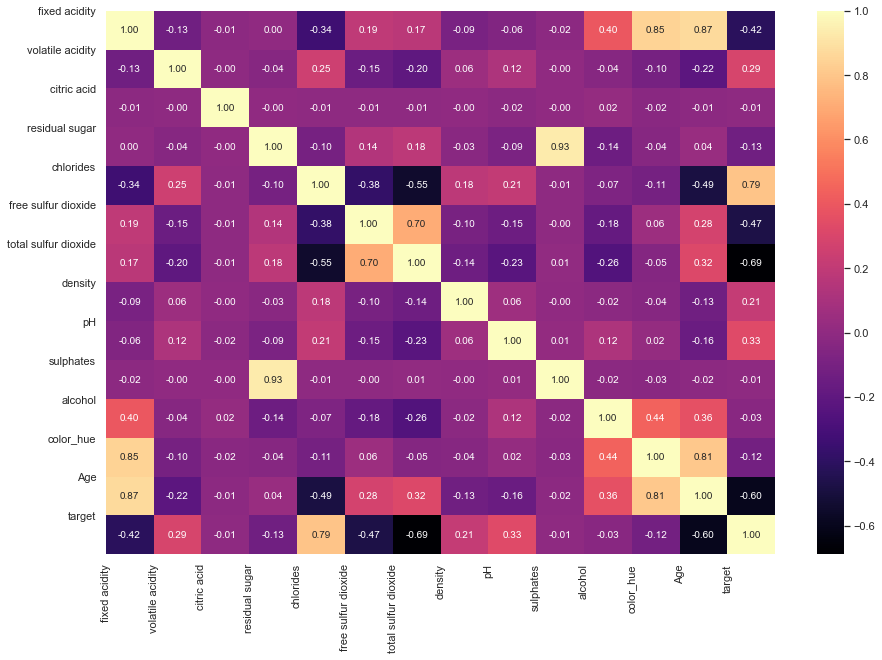

In [30]:
corr = data_scaled.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### Studying correlation with the target variable.

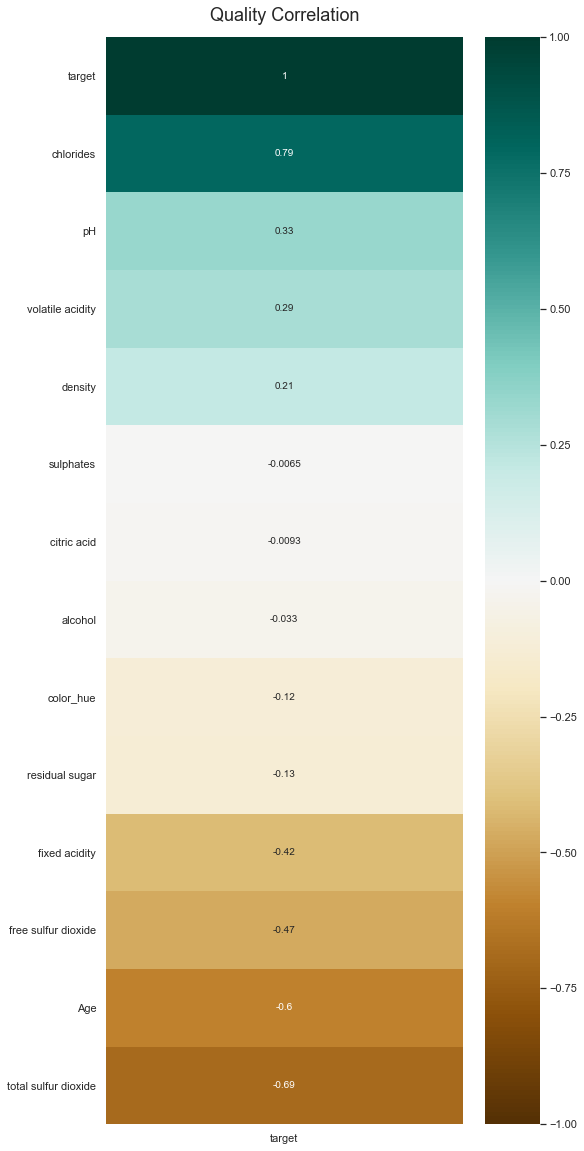

In [31]:
# Let's do a final check to see which columns have the higher correlation with the score. 
plt.figure(figsize=(8, 20))

heatmap = sns.heatmap(data_scaled.corr()[['target']].sort_values(by='target', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')

heatmap.set_title('Quality Correlation', fontdict={'fontsize':18}, pad=16);

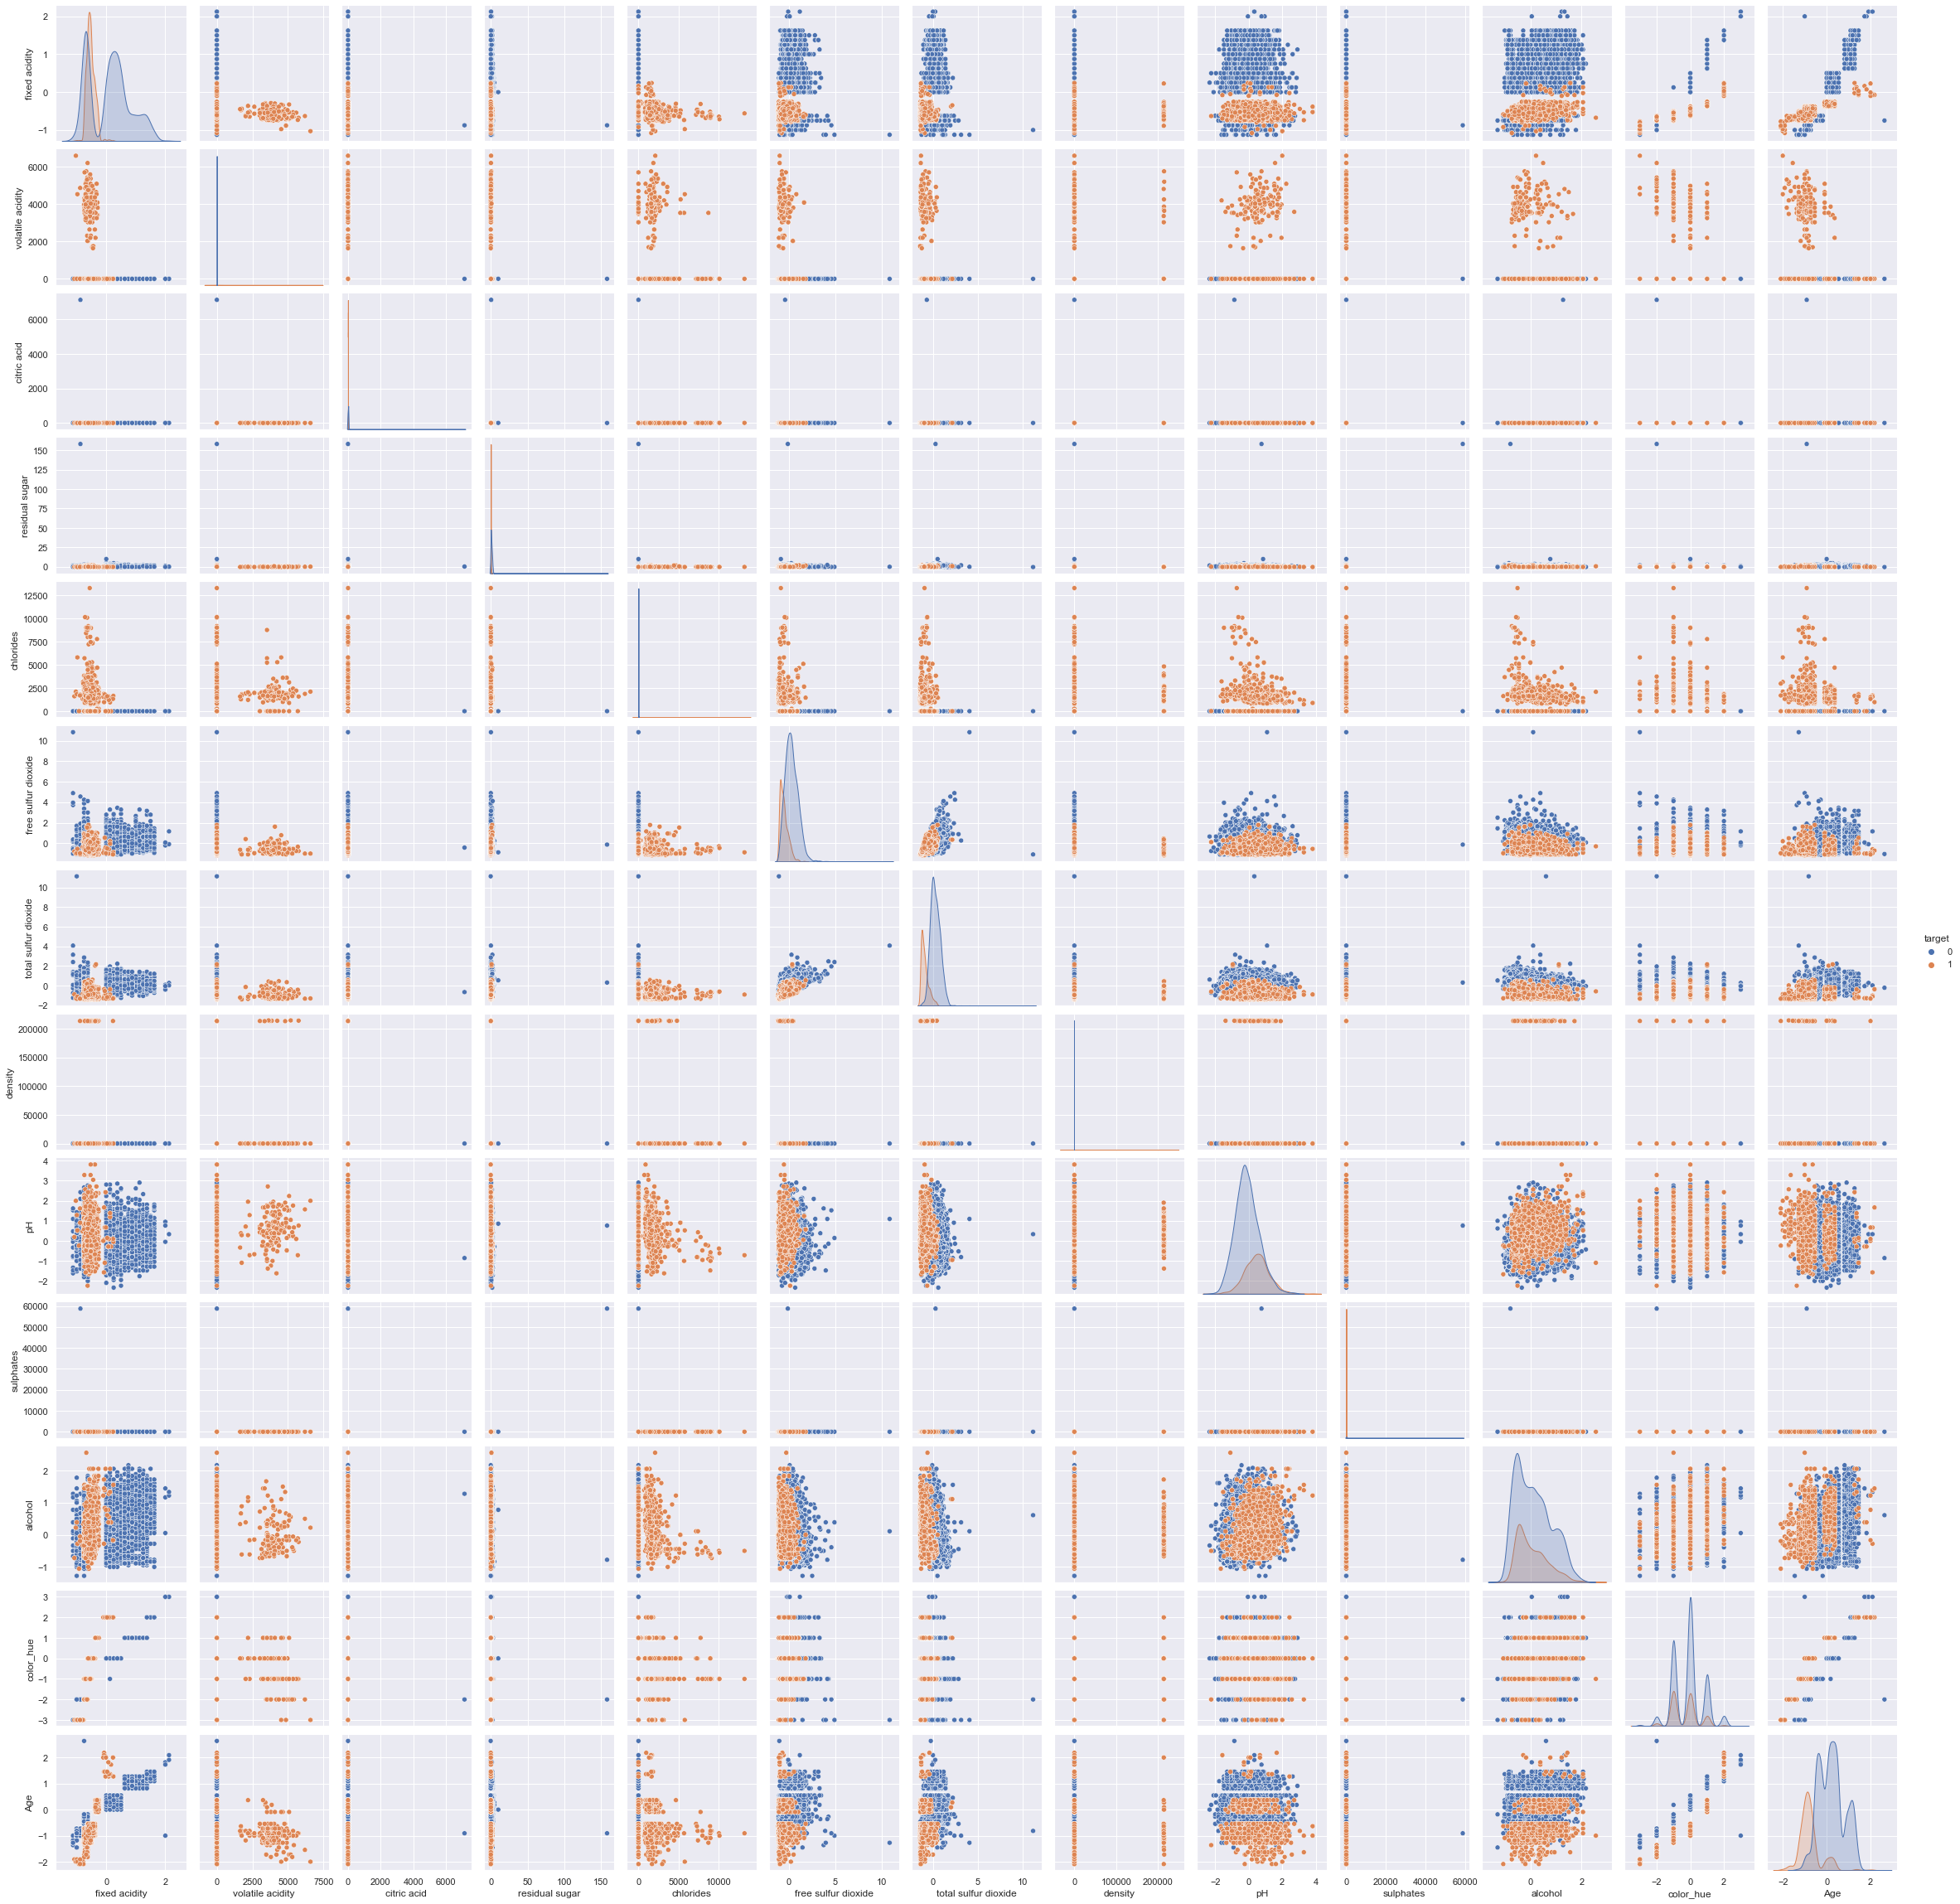

In [32]:
sns.pairplot(data_scaled, hue='target')

In [33]:
# Lets shuffle the data before creating the subsamples

data_scaled = data_scaled.sample(frac=1)

X = data_scaled.drop('target', axis= 1)
y = data_scaled.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Decision Tree

In [35]:
tree_raw = DecisionTreeClassifier(random_state=42)
tree_raw.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
Allmetrics(tree_raw, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3427    0]
 [   0 1120]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1467    4]
 [   2  477]]
 Classification report 
    precision    recall  f1-score  support
0   0.998639  0.997281  0.997959   1471.0
1   0.991684  0.995825  0.993750    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.997581   0.996632  0.996893  0.996748
test   0.996923   0.995161  0.996553  0.995855


,Accuracy,Precision,Recall,f1
Train,0.997581,0.996632,0.996893,0.996748
test,0.996923,0.995161,0.996553,0.995855


# Logistic regression

In [37]:
log_reg_raw = LogisticRegression(random_state=42)

log_reg_raw.fit(X_train, y_train)

y_pred = log_reg_raw.predict(X_test)

In [38]:
Allmetrics(log_reg_raw, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3424    3]
 [   9 1111]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1470    1]
 [   5  474]]
 Classification report 
    precision    recall  f1-score  support
0   0.996610  0.999320  0.997963   1471.0
1   0.997895  0.989562  0.993711    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.996922   0.996158  0.995554  0.995847
test   0.996923   0.997252  0.994441  0.995837


,Accuracy,Precision,Recall,f1
Train,0.996922,0.996158,0.995554,0.995847
test,0.996923,0.997252,0.994441,0.995837


# Logistic regression CV

In [39]:
log_reg_raw_cv = LogisticRegressionCV(random_state=42)

log_reg_raw_cv.fit(X_train, y_train)

y_pred = log_reg_raw_cv.predict(X_test)

In [40]:
Allmetrics(log_reg_raw_cv, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3425    2]
 [   5 1115]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1470    1]
 [   0  479]]
 Classification report 
    precision   recall  f1-score  support
0   1.000000  0.99932  0.999660   1471.0
1   0.997917  1.00000  0.998957    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.998241   0.996757  0.998532  0.997636
test   0.999487   0.998958  0.999660  0.999309


,Accuracy,Precision,Recall,f1
Train,0.998241,0.996757,0.998532,0.997636
test,0.999487,0.998958,0.999660,0.999309


## Hyperparameter tuning   
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Step 1: create a dictionary containing the parameters that we want to optimise

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {"splitter":("best", "random"), 
    "max_depth":(list(range(1,200,20))), 
    "min_samples_split":list(range(1,20,2))
}
params

{'splitter': ('best', 'random'),
 'max_depth': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181],
 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

### Step 2: instantiate the model

In [42]:
model = DecisionTreeClassifier(random_state=42)

### Step 3: Hypertunning of the model: GridSearchCV()

In [43]:
grid_search_cv = GridSearchCV(model, params, 
                              scoring="accuracy",
                              n_jobs=-1, verbose=1, cv=10)

grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                       181],
                         'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

### Step 4: Get the best parameters

In [44]:
#grid_search_cv.best_estimator_
# version 0.23 -> 
grid_search_cv.best_params_

{'max_depth': 21, 'min_samples_split': 3, 'splitter': 'best'}

### Step 5: Build the model with the best parameters

In [45]:
treele = DecisionTreeClassifier(max_depth=21, min_samples_split=7,
                                splitter= 'best',
                                random_state=42)

In [46]:
treele.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, min_samples_split=7, random_state=42)

### Step 6: Evaluate the model

In [47]:
Allmetrics(treele, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3427    0]
 [   5 1115]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1470    1]
 [   2  477]]
 Classification report 
    precision    recall  f1-score  support
0   0.998641  0.999320  0.998981   1471.0
1   0.997908  0.995825  0.996865    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.997361   0.996482  0.996446  0.996451
test   0.998462   0.998275  0.997572  0.997923


,Accuracy,Precision,Recall,f1
Train,0.997361,0.996482,0.996446,0.996451
test,0.998462,0.998275,0.997572,0.997923


In [48]:
# !pip install graphviz

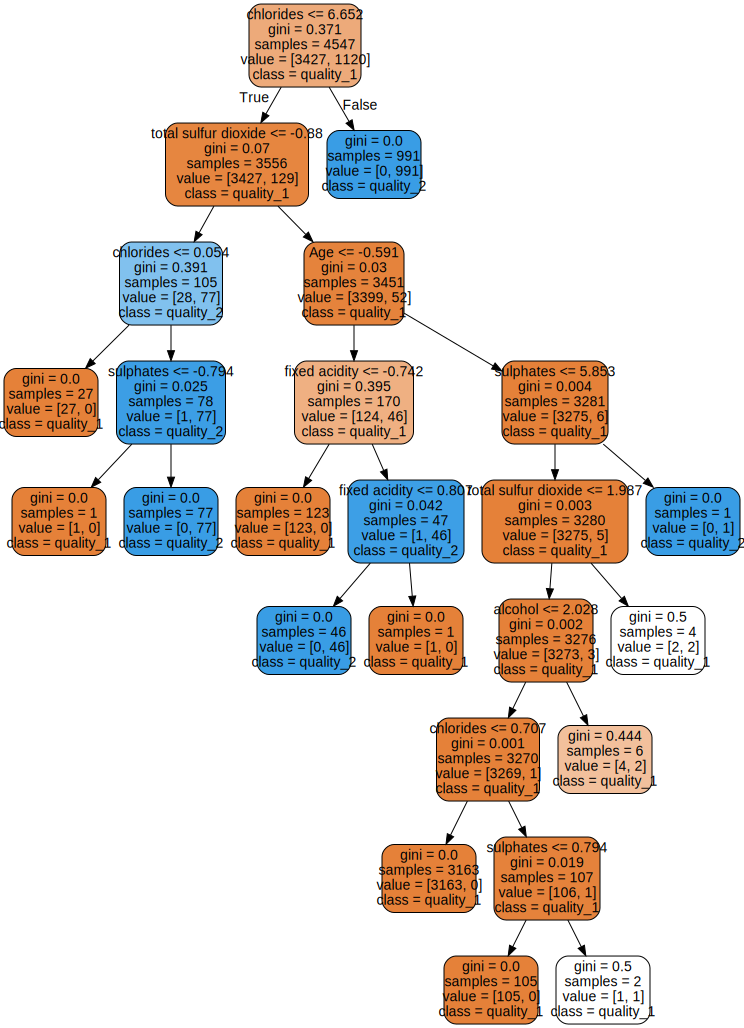

In [49]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

export_graphviz(
        treele,
        out_file=os.path.join(IMAGES_PATH, "quality_tree.dot"),
        feature_names=data.drop(columns=['target'], axis=1).columns,
        class_names=['quality_1', 'quality_2'],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "quality_tree.dot"))

In [50]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color_hue', 'Age'],
      dtype='object')

In [51]:
X2 = X[["pH", "fixed acidity"]]
X2.describe()

,pH,fixed acidity
count,6497.000000,6497.000000
mean,0.040473,-0.048783
std,0.765664,0.663147
min,-2.333333,-1.125000
25%,-0.476190,-0.625000
50%,0.000000,0.000000
75%,0.523810,0.375000
max,3.809524,2.125000


In [52]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=3, random_state=40)
tree_clf_tweaked.fit(X2, y)

DecisionTreeClassifier(max_depth=3, random_state=40)

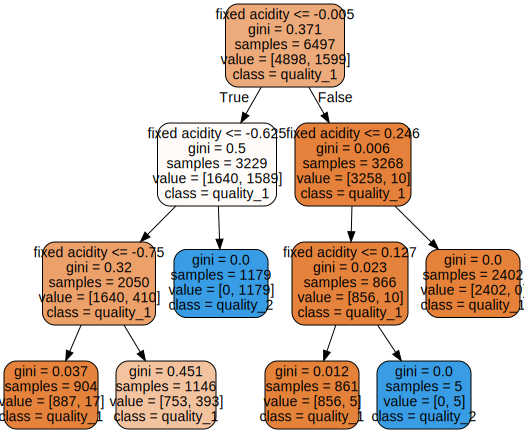

In [53]:
export_graphviz(
        tree_clf_tweaked,
        out_file=os.path.join(IMAGES_PATH, "quality_tree.dot"),
        feature_names=X2.columns,
        class_names=['quality_1', 'quality_2'],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "quality_tree.dot"))

In [54]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 4, -1, 3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    X_set, y_set = X_train, y_train
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "yo", label="Quality 1")
        plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "bs", label="Quality 2")
        plt.axis(axes)
    if iris:
        plt.xlabel("pH", fontsize=14)
        plt.ylabel("fixed acidity", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="upper right", fontsize=14)

Saving figure decision_tree_decision_boundaries_plot


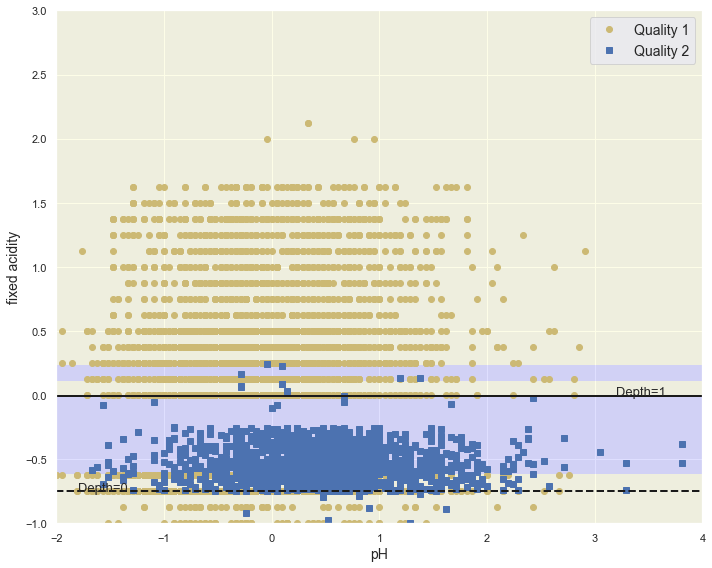

In [55]:
plt.figure(figsize=(10, 8))
plot_decision_boundary(tree_clf_tweaked, X2, y)

plt.plot([-2, 4], [-0.005, -0.005], "k-", linewidth=2)
plt.plot([-2, 4], [-0.75, -0.75], "k--", linewidth=2)

plt.text(-1.8, -0.75, "Depth=0", fontsize=13)
plt.text(3.2, 0, "Depth=1", fontsize=13)


save_fig("decision_tree_decision_boundaries_plot")
plt.show()


# Method 3 - Over-sampling: SMOTE

In [56]:
# !pip install imblearn

In [57]:
from imblearn.over_sampling import SMOTE

# by default: k = 5
smote = SMOTE(random_state=7)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
#fit_resample

In [58]:
print('\nBefore OVER-sampling\n', y_train.value_counts())
print('\nAfter OVER-sampling\n', y_sm.value_counts())


Before OVER-sampling
 0    3427
1    1120
Name: target, dtype: int64

After OVER-sampling
 0    3427
1    3427
Name: target, dtype: int64


# Decision Tree

In [59]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_sm, y_sm)

DecisionTreeClassifier(random_state=42)

In [60]:
Allmetrics(tree, X_sm, y_sm, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3427    0]
 [   0 3427]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1469    2]
 [   2  477]]
 Classification report 
    precision    recall  f1-score  support
0   0.998640  0.998640  0.998640   1471.0
1   0.995825  0.995825  0.995825    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.994603   0.994641  0.994605  0.994603
test   0.997949   0.997233  0.997233  0.997233


,Accuracy,Precision,Recall,f1
Train,0.994603,0.994641,0.994605,0.994603
test,0.997949,0.997233,0.997233,0.997233


# Logistic Regression

In [61]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_sm, y_sm)

y_pred = log_reg.predict(X_test)

In [62]:
Allmetrics(log_reg, X_sm, y_sm, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3401   26]
 [  38 3389]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1460   11]
 [   9  470]]
 Classification report 
    precision    recall  f1-score  support
0   0.993873  0.992522  0.993197   1471.0
1   0.977131  0.981211  0.979167    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.996645   0.996669  0.996646  0.996645
test   0.989744   0.985502  0.986866  0.986182


,Accuracy,Precision,Recall,f1
Train,0.996645,0.996669,0.996646,0.996645
test,0.989744,0.985502,0.986866,0.986182


Text(0.5, 257.44, 'Predicted label')

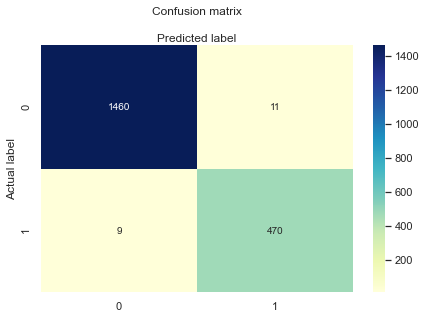

In [63]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Logistic Regression CV

In [64]:
log_reg_cv = LogisticRegressionCV(random_state=42)

log_reg_cv.fit(X_sm, y_sm)

y_pred = log_reg_cv.predict(X_test)

In [65]:
Allmetrics(log_reg_cv, X_sm, y_sm, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[3423    4]
 [   2 3425]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1470    1]
 [   0  479]]
 Classification report 
    precision   recall  f1-score  support
0   1.000000  0.99932  0.999660   1471.0
1   0.997917  1.00000  0.998957    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.998833   0.998835  0.998833  0.998833
test   0.999487   0.998958  0.999660  0.999309


,Accuracy,Precision,Recall,f1
Train,0.998833,0.998835,0.998833,0.998833
test,0.999487,0.998958,0.999660,0.999309


Text(0.5, 257.44, 'Predicted label')

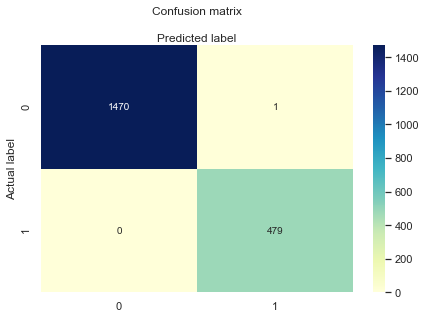

In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Under-sampling:Cluster centroids

In [67]:
from imblearn.under_sampling import ClusterCentroids

# ClusterCentroids
sampler = ClusterCentroids()
X_cc, y_cc = sampler.fit_resample(X_train, y_train)

In [68]:
print('\nBefore UNDER-sampling\n', y_train.value_counts())
print('\nAfter UNDER-resampling\n', y_cc.value_counts())


Before UNDER-sampling
 0    3427
1    1120
Name: target, dtype: int64

After UNDER-resampling
 0    1120
1    1120
Name: target, dtype: int64


# Decision Tree

In [69]:
tree_cc = DecisionTreeClassifier(random_state=42)
tree_cc.fit(X_cc, y_cc)

DecisionTreeClassifier(random_state=42)

In [70]:
Allmetrics(tree_cc, X_cc, y_cc, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1120    0]
 [   0 1120]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1466    5]
 [   2  477]]
 Classification report 
    precision    recall  f1-score  support
0   0.998638  0.996601  0.997618   1471.0
1   0.989627  0.995825  0.992716    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.983036   0.983310  0.983036  0.983032
test   0.996410   0.994132  0.996213  0.995167


,Accuracy,Precision,Recall,f1
Train,0.983036,0.983310,0.983036,0.983032
test,0.996410,0.994132,0.996213,0.995167


# Logistic Regression

In [71]:
log_reg_cc = LogisticRegression(random_state=42)

log_reg_cc.fit(X_cc, y_cc)

y_pred = log_reg_cc.predict(X_test)

In [72]:
Allmetrics(log_reg_cc, X_cc, y_cc, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1117    3]
 [   7 1113]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1469    2]
 [   3  476]]
 Classification report 
    precision    recall  f1-score  support
0   0.997962  0.998640  0.998301   1471.0
1   0.995816  0.993737  0.994775    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.995536   0.995567  0.995536  0.995536
test   0.997436   0.996889  0.996189  0.996538


,Accuracy,Precision,Recall,f1
Train,0.995536,0.995567,0.995536,0.995536
test,0.997436,0.996889,0.996189,0.996538


# Logistic Regression CV

In [73]:
log_reg_cv_cc = LogisticRegressionCV(random_state=42)

log_reg_cv_cc.fit(X_cc, y_cc)

y_pred = log_reg_cv_cc.predict(X_test)

In [74]:
Allmetrics(log_reg_cv_cc, X_cc, y_cc, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1118    2]
 [   1 1119]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1470    1]
 [   0  479]]
 Classification report 
    precision   recall  f1-score  support
0   1.000000  0.99932  0.999660   1471.0
1   0.997917  1.00000  0.998957    479.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.997321   0.997345  0.997321  0.997321
test   0.999487   0.998958  0.999660  0.999309


,Accuracy,Precision,Recall,f1
Train,0.997321,0.997345,0.997321,0.997321
test,0.999487,0.998958,0.999660,0.999309
